<a href="https://www.kaggle.com/code/kasaligabriel/animal-classification-with-tensorflow?scriptVersionId=101722431" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [10]:
# Importing important packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import os

data_dir = '../input/animal-image-dataset-90-different-animals/animals/animals'

Name = os.listdir(data_dir)
print(Name)
print(len(Name))

N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']
90


In [12]:
# Rescaling the input image as well as Data Augmentation
datagen = ImageDataGenerator(rescale = 1./255,
        validation_split=0.2,
        rotation_range=20,
        shear_range=10)

data_dir = "../input/animal-image-dataset-90-different-animals/animals/animals"

train_generator = datagen.flow_from_directory(data_dir,
    target_size=(300,300)
    ,subset = "training")

validation_generator = datagen.flow_from_directory(data_dir,
    target_size=(300,300),
    subset = "validation")


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


In [13]:
model = Sequential()

# Using the InceptionResnet pretrained model for transfer learning
pre_trained_model = tf.keras.applications.InceptionResNetV2(input_shape = (300, 300, 3), 
                                include_top = False, classes=90, 
                                weights = 'imagenet',
                               pooling='avg')

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

model.add(pre_trained_model)

In [14]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(90, activation='softmax'))

pre_trained_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 149, 149, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 149, 149, 32) 0           batch_normalization_203[0][0]    
________________________________________________________________________________

In [15]:
# compiling the model
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate=0.001), 
              loss = tf.keras.losses.CategoricalCrossentropy(), 
              metrics = ['accuracy'])

In [16]:
# defining the callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after training loss becomes less than 0.12

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.12):

      # Stop if threshold is met
      print("\nLoss is lower than 0.12 so cancelling training!")
      self.model.stop_training = True
    
# Instantiate class
callbacks = myCallback()

In [17]:
# Fitting the model
history = model.fit( train_generator,
            validation_data = validation_generator,
            epochs = 100,
            callbacks = [callbacks])

Epoch 1/100
135/135 [==============================] - 179s 1s/step - loss: 1.3544 - accuracy: 0.6965 - val_loss: 0.5648 - val_accuracy: 0.8509
Epoch 2/100
135/135 [==============================] - 166s 1s/step - loss: 0.5123 - accuracy: 0.8523 - val_loss: 0.5458 - val_accuracy: 0.8491
Epoch 3/100
135/135 [==============================] - 164s 1s/step - loss: 0.3592 - accuracy: 0.8884 - val_loss: 0.5200 - val_accuracy: 0.8722
Epoch 4/100
135/135 [==============================] - 166s 1s/step - loss: 0.2926 - accuracy: 0.9102 - val_loss: 0.4466 - val_accuracy: 0.8722
Epoch 5/100
135/135 [==============================] - 165s 1s/step - loss: 0.2619 - accuracy: 0.9155 - val_loss: 0.5395 - val_accuracy: 0.8639
Epoch 6/100
135/135 [==============================] - 171s 1s/step - loss: 0.2186 - accuracy: 0.9285 - val_loss: 0.4406 - val_accuracy: 0.8972
Epoch 7/100
135/135 [==============================] - 167s 1s/step - loss: 0.2039 - accuracy: 0.9368 - val_loss: 0.5404 - val_accuracy:

In [18]:
# Saving the model.
model.save("AnimalClassification.h5")

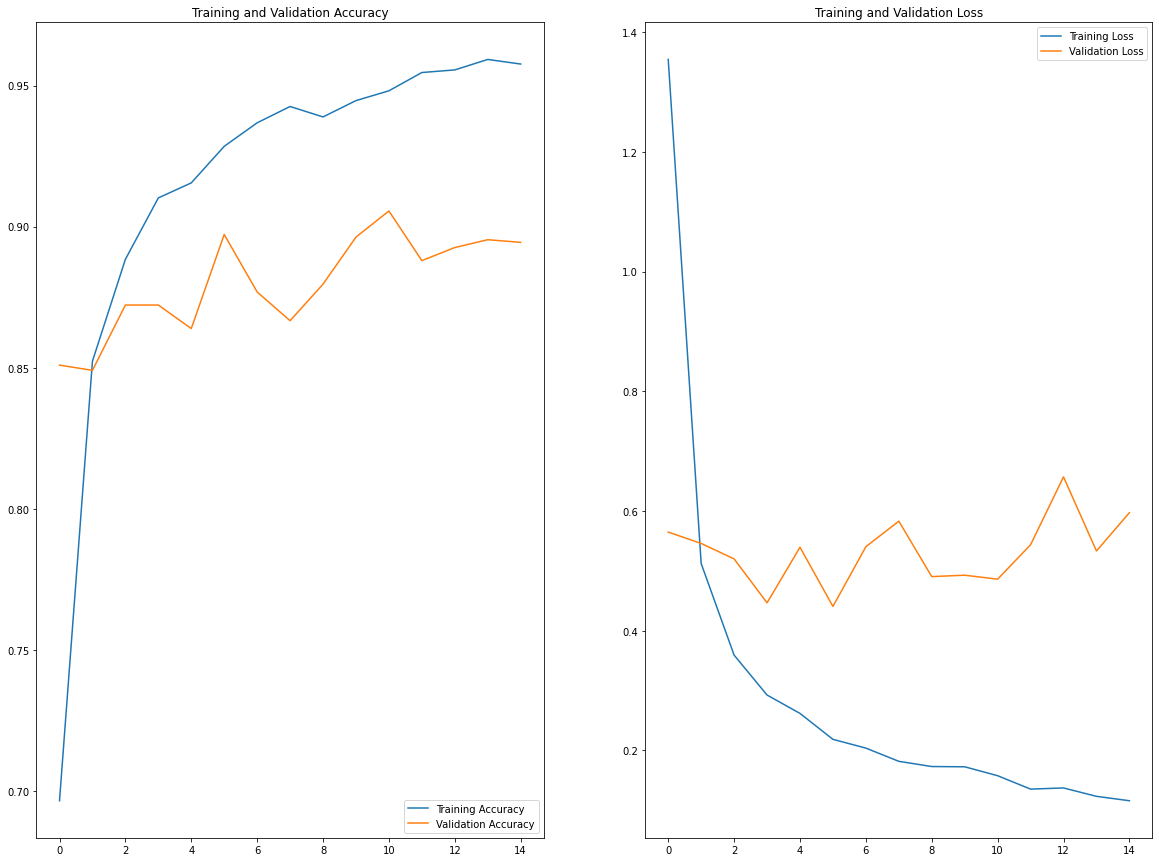

In [21]:
# Model Evaluation by comparing the training and validation accuracy as well as the loss.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Both the Training and Validation accuracy are properly alligned which shows that overfitting of the data was avoided. The training accuracy is **95%**(very high prediction accuaracy) and the validation accuracy is **89%** which is a good sign that the model is good to use for prediction.
The training and validation loss have a very little deviation from each other and are both decreasing with each training.The losses are both below **0.6** at the final epoch.

In [ ]:
# predicting new images
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(300,300,3))
    plt.imshow(img)
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict_classes(img)
    probability=round(np.max(model.predict_proba(img)*100),2)
    #print ('Animal Is',icd[answer[0]], 'With probability',probability)
    print (probability, ' % chances are there that the Animal Is',icd[answer[0]])